# Group 48's Final Project
---

## Introduction:

Our group has chosen to look at datasets pretaining to police activity. What we were looking for in order to determine which was "the best neighborhood in Pittsburgh" was the one with the least police activity. Typically, the less police activity, the less crime and the safer the neighborhood, hence why we went this route. We were initially looking to see how "bike friendly" each neighborhood was, but sadly the datasets that were available did not provide us with enough information to work with. From there we decided to turn to looking at fires or something related to fire in each neighborhood, but similar to the bikes, there wasn't enough data that pretained to what we were looking for. From the topic of fires, we then switched and fully settled on something simiar: *police activity.* 

---

## The Metric:

Describe your metric, what features are you measuring. What datasets are you using?

Our metric deals with looking at police activity, which can be anything from small crimes to full on incidents, in order to determine which neighborhood in Pittsburgh is the best. The datasets in which we are using deal with the following:

* Non Traffic Citations - 
* Police Incident Blotter - A list of incidents such as murders, identity theft, drug possession, vehicle theft, etc... that required police interfering
* Arrest Data - Information on people taken into custody by City of Pittsburgh police officers.

Essentially, what we are looking to measure is how often police have to intervene within each Pittsburgh neighborhood. We are looking to find the neighborhood with the least police interference, as less interference by the police most likely means the neigborhood is more "peaceful" and more safe to live in. 

## Arrest Data Metric:

The dataset for arrests in Pittsburgh neighborhoods was pretty enlightening.

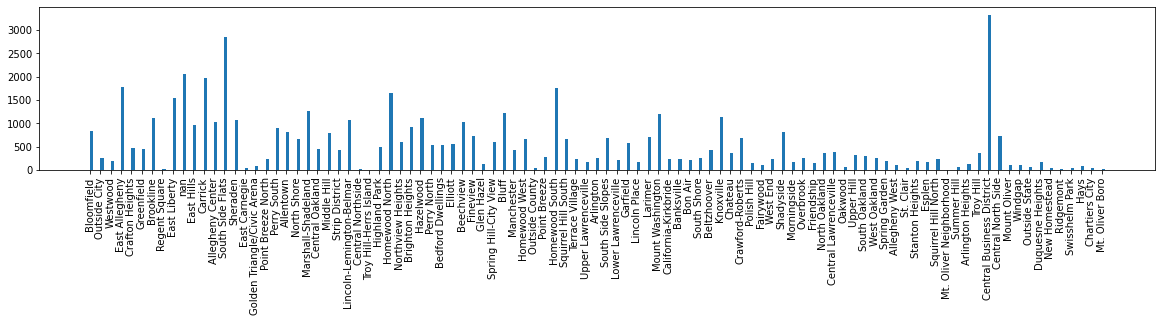

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

arrests = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")
num_arrests = arrests.loc[:, "INCIDENTNEIGHBORHOOD"]

arrestdict = dict()

for INCIDENTNEIGHBORHOOD in num_arrests:
    if INCIDENTNEIGHBORHOOD not in arrestdict:
        arrestdict[INCIDENTNEIGHBORHOOD] = 1
    else:
        arrestdict[INCIDENTNEIGHBORHOOD] = arrestdict[INCIDENTNEIGHBORHOOD] + 1

plt.figure(figsize=(20, 3))  # width:20, height:3
plt.bar(range(len(arrestdict)), arrestdict.values(), align='edge', width=0.3)
plt.xticks(range(len(arrestdict)), arrestdict.keys(), rotation='vertical')
plt.show()

According to the data, Herrs Island is the best neighborhood if you want to equate less arrests with higher quality of life. They have the lowest number of arrests, with only 6 arrests documented in the dataset. "Mt. Oliver Neighborhood" only has 2, however, I believe it is the same thing as "Mount Oliver", which has 108, so Herrs Island wins.

## The Best Neighborhood:

## Conclusion: